In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:\\Learnbay\\Stats & ML by Kumar Sundaram Sir\\Notes\\ML\\Naive Bayes Theorem\\spam.tsv",sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [7]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
# Data is imbalance,we have to balance it prior building model

ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [9]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [10]:
spam = spam.sample(ham.shape[0],replace = True)

In [11]:
print(ham.shape)
print(spam.shape)

(4825, 4)
(4825, 4)


In [12]:
data = ham.append(spam, ignore_index =True)
data.shape

(9650, 4)

In [13]:
data.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2


In [14]:
data.tail()

,label,message,length,punct
9645,spam,Free entry in 2 a weekly comp for a chance to ...,143,6
9646,spam,Would you like to see my XXX pics they are so ...,84,1
9647,spam,Reminder: You have not downloaded the content ...,127,9
9648,spam,URGENT! Your Mobile number has been awarded wi...,126,3
9649,spam,SplashMobile: Choose from 1000s of gr8 tones e...,155,4


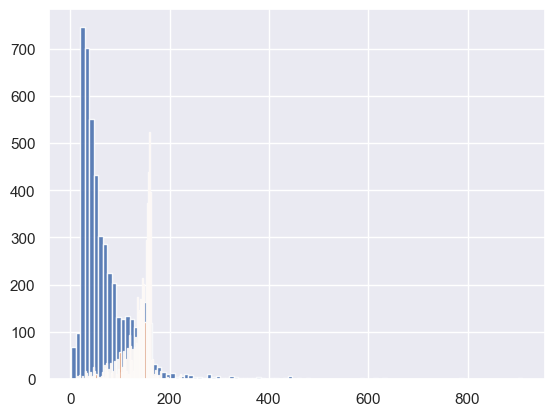

In [15]:
 #visualization by using ham and spam data
    
plt.hist(data[data['label']=='ham']['length'],bins = 100,alpha =0.9)
plt.hist(data[data['label']=='spam']['length'],bins = 100,alpha =0.9)
plt.show()

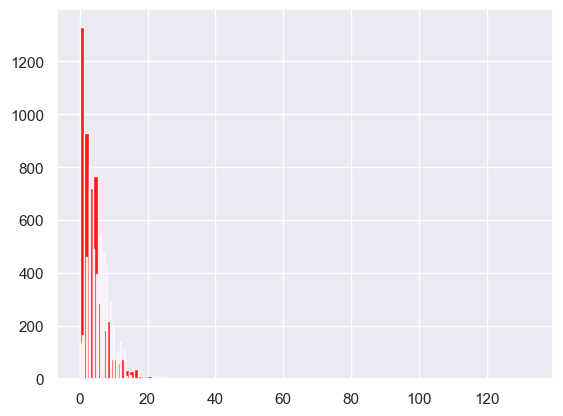

In [16]:
 #visualization by using ham and spam data
    
plt.hist(data[data['label']=='ham']['punct'],bins = 100,alpha =0.9,color = 'red')
plt.hist(data[data['label']=='spam']['punct'],bins = 100,alpha =0.9,color = 'magenta')
plt.show()

In [17]:
data.head(2)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6


In [27]:
# split the data into training and test for building a model and prediction

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,data['label'],test_size = 0.25,random_state =101,stratify = data['label'])

In [24]:
# We have to convert 'message' into BOW format (text to vector)
# ML works with number only

#import re  # regular expression
#import nltk # natural language tool kit
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer

In [26]:
# Bag Of Words-data['message']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#cv = CountVectorizer(max_features = 100) # will get only 100 data instead of 8713,but we miss lot of data
x =cv.fit_transform(data['message']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
pd.DataFrame(x).shape
# we got 8713 unique words after treatment

(9650, 8713)

In [29]:
# Building Naive Bayes Theorem
# Guassian NB
# Bernouli NB

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

## GaussianNB

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [32]:
y_pred_gnb_test

array(['ham', 'ham', 'spam', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [33]:
# Evaluate matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [35]:
print(confusion_matrix(y_train,y_pred_gnb_train))
print()
print(confusion_matrix(y_test,y_pred_gnb_test))

[[3372  247]
 [   0 3618]]

[[1075  131]
 [   0 1207]]


In [36]:
print(classification_report(y_train,y_pred_gnb_train))
print()
print(classification_report(y_test,y_pred_gnb_test))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.96      3619
        spam       0.94      1.00      0.97      3618

    accuracy                           0.97      7237
   macro avg       0.97      0.97      0.97      7237
weighted avg       0.97      0.97      0.97      7237


              precision    recall  f1-score   support

         ham       1.00      0.89      0.94      1206
        spam       0.90      1.00      0.95      1207

    accuracy                           0.95      2413
   macro avg       0.95      0.95      0.95      2413
weighted avg       0.95      0.95      0.95      2413



In [37]:
print(accuracy_score(y_train,y_pred_gnb_train))
print()
print(accuracy_score(y_test,y_pred_gnb_test))

0.9658698355672239

0.9457107335267302


## BernoulliNB

In [38]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB()

In [40]:
y_pred_bnb_train = bnb.predict(x_train)
y_pred_bnb_test = bnb.predict(x_test)

In [41]:
y_pred_bnb_test

array(['ham', 'ham', 'spam', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [42]:
# Evaluate matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
print(confusion_matrix(y_train,y_pred_bnb_train))
print()
print(confusion_matrix(y_test,y_pred_bnb_test))

[[3617    2]
 [ 113 3505]]

[[1204    2]
 [  50 1157]]


In [44]:
print(classification_report(y_train,y_pred_bnb_train))
print()
print(classification_report(y_test,y_pred_bnb_test))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3619
        spam       1.00      0.97      0.98      3618

    accuracy                           0.98      7237
   macro avg       0.98      0.98      0.98      7237
weighted avg       0.98      0.98      0.98      7237


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.96      0.98      1207

    accuracy                           0.98      2413
   macro avg       0.98      0.98      0.98      2413
weighted avg       0.98      0.98      0.98      2413



In [45]:
print(accuracy_score(y_train,y_pred_bnb_train))
print()
print(accuracy_score(y_test,y_pred_bnb_test))

0.9841094376122703

0.9784500621632822
